In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dataset/Embedding/'
outputFilename = 'delhiconventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [3]:
X = pd.read_csv(path+'delhi_WE_100.csv')
Y = pd.read_csv(path+'delhi_classLabel.csv')
print(X.shape,Y.shape)

(15438, 100) (15438, 1)


In [4]:
Y

,label
0,Others
1,Traffic information/advisory
2,Others
3,Others
4,Others
...,...
15433,Others
15434,Road closure
15435,Traffic congestion/heavy traffic
15436,Others


In [5]:
Y.label.value_counts()

Traffic obstruction/car breakdown    4831
Others                               3459
Traffic congestion/heavy traffic     2821
Road closure                         1487
Water logging                        1156
Traffic information/advisory         1001
City program                          416
Accident                              267
Name: label, dtype: int64

In [6]:
labels = Y.label.unique()
labels.sort()
labels

array(['Accident', 'City program', 'Others', 'Road closure',
       'Traffic congestion/heavy traffic', 'Traffic information/advisory',
       'Traffic obstruction/car breakdown', 'Water logging'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 100) (3860, 100)


In [8]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [9]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[1.03956245e-03, 3.28550612e-04, 2.22819452e-02, ...,
        1.07777405e-03, 9.52845969e-01, 1.48796423e-03],
       [1.67731825e-02, 1.67889425e-01, 8.35150774e-02, ...,
        9.43264021e-03, 4.47813377e-02, 7.53552128e-02],
       [1.96713112e-04, 2.47620836e-03, 3.48328849e-03, ...,
        1.69432737e-04, 6.75504305e-04, 9.05692681e-04],
       ...,
       [1.58544008e-03, 3.29021322e-04, 1.57122438e-02, ...,
        1.17383399e-03, 9.76211373e-01, 1.79878912e-03],
       [1.76941187e-03, 5.85200062e-04, 1.08273852e-02, ...,
        1.28185451e-03, 1.11535529e-03, 1.06874252e-01],
       [5.55101089e-05, 4.42075934e-05, 3.94305711e-03, ...,
        1.37251071e-04, 2.40524345e-04, 9.94498765e-01]])

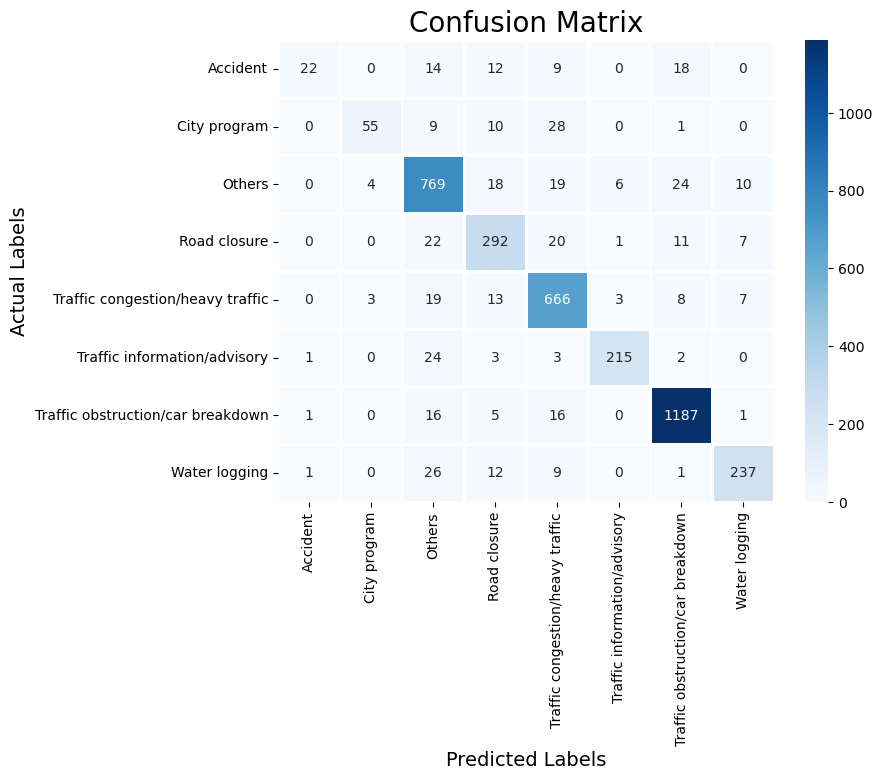

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [11]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.88      0.29      0.44        75
                     City program       0.89      0.53      0.67       103
                           Others       0.86      0.90      0.88       850
                     Road closure       0.80      0.83      0.81       353
 Traffic congestion/heavy traffic       0.86      0.93      0.89       719
     Traffic information/advisory       0.96      0.87      0.91       248
Traffic obstruction/car breakdown       0.95      0.97      0.96      1226
                    Water logging       0.90      0.83      0.86       286

                         accuracy                           0.89      3860
                        macro avg       0.89      0.77      0.80      3860
                     weighted avg       0.89      0.89      0.89      3860

F1-score:  89.19689119170985 %


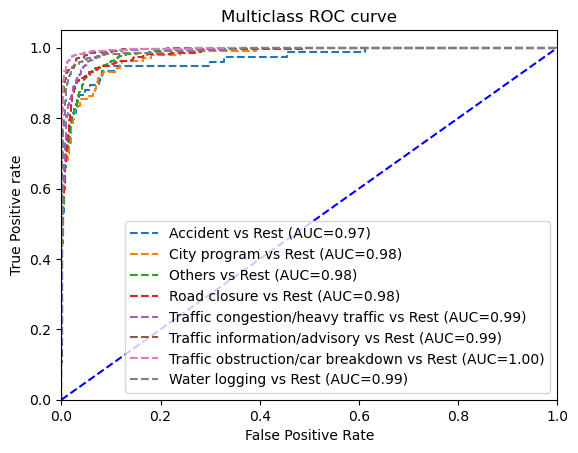

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.892,0.887,0.769,0.803,0.985


In [14]:
import sys

with open(outputFilename, 'a') as f:
    print('GBoost-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [15]:
X = pd.read_csv(path+'delhi_infercent_4096_2.csv')
X = X.iloc[:,1:]
# Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(15438, 4096) (15438, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 4096) (3860, 4096)


In [17]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [18]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[3.98645760e-03, 6.59669245e-04, 8.39769253e-03, ...,
        2.23300096e-03, 3.53256436e-03, 1.09068075e-03],
       [4.34048999e-04, 1.46856192e-03, 8.35995547e-01, ...,
        4.85145288e-02, 4.77684085e-02, 1.04802017e-03],
       [1.32436911e-04, 8.99232590e-04, 9.67933477e-01, ...,
        1.46169274e-03, 1.07280650e-02, 1.20899407e-02],
       ...,
       [1.36857796e-05, 4.20620596e-05, 1.03472405e-02, ...,
        9.88361366e-01, 9.21543255e-05, 6.58262598e-05],
       [1.86156739e-03, 1.52086698e-03, 6.82014090e-01, ...,
        2.50287895e-01, 2.42025135e-02, 1.62916280e-03],
       [1.81863623e-04, 2.63294776e-04, 4.09694597e-03, ...,
        1.47437264e-03, 9.01227320e-01, 2.91500976e-04]])

In [19]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.94      0.97      0.95        65
                     City program       0.93      0.83      0.88        96
                           Others       0.92      0.95      0.94       887
                     Road closure       0.93      0.90      0.92       371
 Traffic congestion/heavy traffic       0.94      0.95      0.95       711
     Traffic information/advisory       0.97      0.95      0.96       247
Traffic obstruction/car breakdown       0.99      0.98      0.99      1226
                    Water logging       0.98      0.96      0.97       257

                         accuracy                           0.95      3860
                        macro avg       0.95      0.94      0.94      3860
                     weighted avg       0.95      0.95      0.95      3860

F1-score:  95.46632124352331 %


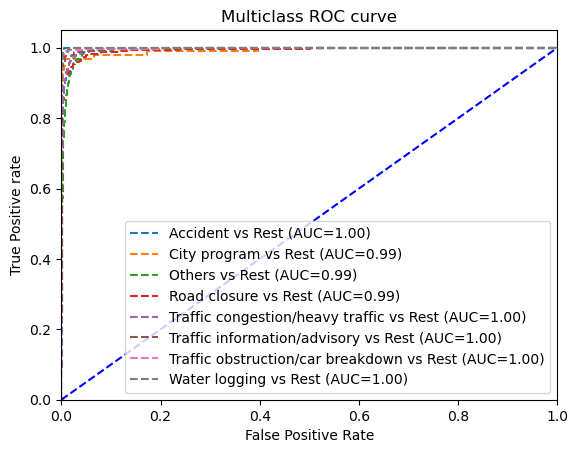

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.955,0.951,0.937,0.943,0.997


In [22]:
import sys

with open(outputFilename, 'a') as f:
    print('GBoost-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)